In [ ]:
# %%

# Use Google Colab
use_google_colab = False
# Process the training dataset
training_data_processing = False
# Train the model
model_training = True
# Validation the model
model_validation = True
# Load the model from your Google Drive or local file system
model_loading = False

import numpy as np
import torch

from util.cuda import cuda
from util.gpu_info import gpuInfo
from util.data_augmentation import training_data_loading, training_data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import submission_creating, test

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *


path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/DLinkNet50.model"

cuda_available = torch.cuda.is_available()
if cuda_available:
    print("CUDA is available. Utilize GPUs for computation")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Utilize CPUs for computation.")
    device = torch.device("cpu")

gpu_info = gpuInfo()

model = DLinkNet50()

if cuda_available:
    model.cuda()

print(model)

# The resolution of resized training images and the corresponding masks
training_resize = 512
# The number of resized training pairs used for data augmentation
training_number = 367
# The resolution of resized testing images
testing_resize = int(608 * training_resize / 400)
if testing_resize % 2 == 1:
    testing_resize += 1

if training_data_processing:
    # Load and generate the resized training dataset and validation dataset
    images_training, labels_training, images_validation, labels_validation = (
        training_data_loading(path_training, training_resize, training_number)
    )
    # Generate the augmented training dataset
    rotations = [0, 45, 90, 135]  # the rotation angle

    flips = ["original", np.flipud, np.fliplr]  # 'original', np.flipud, np.fliplr

    shifts = [(-16, 16)]

    images_augmented, labels_augmented = training_data_augmentation(
        images_training, labels_training, rotations, flips, shifts, training_resize
    )
    # Save the augmented training dataset and resized validation dataset
    # to your Google Drive or local file system
    np.save(f"{path_data}images_training", images_augmented)
    np.save(f"{path_data}labels_training", labels_augmented)
    np.save(f"{path_data}images_validation", images_validation)
    np.save(f"{path_data}labels_validation", labels_validation)
elif not model_loading:
    # Load the augmented training dataset and resized validation dataset
    # from your Google Drive or local file system
    images_augmented = np.load(f"{path_data}images_training.npy")
    labels_augmented = np.load(f"{path_data}labels_training.npy")
    images_validation = np.load(f"{path_data}images_validation.npy")
    labels_validation = np.load(f"{path_data}labels_validation.npy")

if model_training:
    print(f"\nimages_training.shape = {images_augmented.shape}")
    print(f"labels_training.shape = {labels_augmented.shape}")
    print(f"images_validation.shape = {images_validation.shape}")
    print(f"labels_validation.shape = {labels_validation.shape}")

CUDA is available. Utilize GPUs for computation
Mon Nov 18 13:06:49 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   42C    P8             17W /  340W |     815MiB /  16376MiB |     19%      Default |
|                                         |                        |                  N/A |


/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DLinkNet50(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256,

/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.40378206968307495
→ ACC for Batch 1: 0.5966472625732422
→ Recall for Batch 1: 0.37666878575969487
→ Running_loss for Batch 21: 0.36411431431770325
→ ACC for Batch 21: 0.9656391143798828
→ Recall for Batch 21: 0.0
→ Running_loss for Batch 41: 0.384844034910202
→ ACC for Batch 41: 0.9848957061767578
→ Recall for Batch 41: 0.25406661502711075
→ Running_loss for Batch 61: 0.27122095227241516
→ ACC for Batch 61: 0.9681930541992188
→ Recall for Batch 61: 0.6806813057203316
→ Running_loss for Batch 81: 0.3643051087856293
→ ACC for Batch 81: 0.9309272766113281
→ Recall for Batch 81: 0.827887877164792
→ Running_loss for Batch 101: 0.24864813685417175
→ ACC for Batch 101: 0.9585723876953125
→ Recall for Batch 101: 0.7624507810133703
→ Running_loss for Batch 121: 0.2469165325164795
→ ACC for Batch 121: 0.9828720092773438
→ Recall for Batch 121: 0.530875748502994
→ Running_loss for Batch 141: 0.2442777305841446
→ ACC f

  1%|          | 1/100 [09:34<15:48:01, 574.56s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.19198773801326752
→ ACC for Batch 1: 0.9843559265136719
→ Recall for Batch 1: 0.890330306356651
→ Running_loss for Batch 21: 0.131259948015213
→ ACC for Batch 21: 0.98944091796875
→ Recall for Batch 21: 0.8064949766520447
→ Running_loss for Batch 41: 0.16875794529914856
→ ACC for Batch 41: 0.9892158508300781
→ Recall for Batch 41: 0.8064582476347182
→ Running_loss for Batch 61: 0.19013503193855286
→ ACC for Batch 61: 0.9526939392089844
→ Recall for Batch 61: 0.614447021751499
→ Running_loss for Batch 81: 0.15533600747585297
→ ACC for Batch 81: 0.9892978668212891
→ Recall for Batch 81: 0.7936972924988903
→ Running_loss for Batch 101: 0.1631963551044464
→ ACC for Batch 101: 0.9701385498046875
→ Recall for Batch 101: 0.672646798465624
→ Running_loss for Batch 121: 0.20150046050548553
→ ACC for Batch 121: 0.9769802093505859
→ Recall for Batch 121: 0.7319208866572776
→ Running_loss for Batch 141: 0.2246338576078

  2%|▏         | 2/100 [17:55<14:27:39, 531.22s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.2086695432662964
→ ACC for Batch 1: 0.9880542755126953
→ Recall for Batch 1: 0.7397645854657113
→ Running_loss for Batch 21: 0.177972674369812
→ ACC for Batch 21: 0.9961566925048828
→ Recall for Batch 21: 0.726960503720664
→ Running_loss for Batch 41: 0.1456470936536789
→ ACC for Batch 41: 0.9701442718505859
→ Recall for Batch 41: 0.7848483992200966
→ Running_loss for Batch 61: 0.3257893919944763
→ ACC for Batch 61: 0.9937114715576172
→ Recall for Batch 61: 0.604133545310016
→ Running_loss for Batch 81: 0.20171941816806793
→ ACC for Batch 81: 0.988739013671875
→ Recall for Batch 81: 0.7797155889455326
→ Running_loss for Batch 101: 0.16918833553791046
→ ACC for Batch 101: 0.957794189453125
→ Recall for Batch 101: 0.6791515551159468
→ Running_loss for Batch 121: 0.15587197244167328
→ ACC for Batch 121: 0.9790363311767578
→ Recall for Batch 121: 0.8676174084091468
→ Running_loss for Batch 141: 0.13218003511428

  3%|▎         | 3/100 [26:36<14:11:15, 526.55s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.20825359225273132
→ ACC for Batch 1: 0.9758472442626953
→ Recall for Batch 1: 0.6529871272967324
→ Running_loss for Batch 21: 0.20176835358142853
→ ACC for Batch 21: 0.9979000091552734
→ Recall for Batch 21: 0.661251504211793
→ Running_loss for Batch 41: 0.13646240532398224
→ ACC for Batch 41: 0.9765815734863281
→ Recall for Batch 41: 0.8078680976402478
→ Running_loss for Batch 61: 0.1405789852142334
→ ACC for Batch 61: 0.9717998504638672
→ Recall for Batch 61: 0.7691023893633
→ Running_loss for Batch 81: 0.16780267655849457
→ ACC for Batch 81: 0.9959487915039062
→ Recall for Batch 81: 0.8179054987565626
→ Running_loss for Batch 101: 0.18844880163669586
→ ACC for Batch 101: 0.9764022827148438
→ Recall for Batch 101: 0.6761932255581217
→ Running_loss for Batch 121: 0.15596914291381836
→ ACC for Batch 121: 0.9896564483642578
→ Recall for Batch 121: 0.7668254110881481
→ Running_loss for Batch 141: 0.1233447939

  4%|▍         | 4/100 [34:39<13:34:59, 509.37s/it]

Validation loss for Epoch 4: 0.19589322805404663

Acurácia de validação:  0.9826272853783199
F1-score de validação:  0.6508048541727032
IoU de validação:  0.9703640161045513
Recall de validação:  0.6853404482159557

---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.23842982947826385
→ ACC for Batch 1: 0.9887123107910156
→ Recall for Batch 1: 0.7523021988348055
→ Running_loss for Batch 21: 0.10816320031881332
→ ACC for Batch 21: 0.9918899536132812
→ Recall for Batch 21: 0.8895066018068103
→ Running_loss for Batch 41: 0.19792760908603668
→ ACC for Batch 41: 0.9940929412841797
→ Recall for Batch 41: 0.6425385239253852
→ Running_loss for Batch 61: 0.23724393546581268
→ ACC for Batch 61: 0.9898643493652344
→ Recall for Batch 61: 0.6881964117091596
→ Running_loss for Batch 81: 0.1502944529056549
→ ACC for Batch 81: 0.9957122802734375
→ Recall for Batch 81: 0.8377409233527566
→ Running_loss for Batch 101: 0.14370225369930267
→ ACC for Batch 101: 0.9938774108886719

  5%|▌         | 5/100 [42:42<13:11:42, 500.03s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.16077366471290588
→ ACC for Batch 1: 0.9982872009277344
→ Recall for Batch 1: 0.7606112054329371
→ Running_loss for Batch 21: 0.1681777387857437
→ ACC for Batch 21: 0.9788780212402344
→ Recall for Batch 21: 0.7179439077009662
→ Running_loss for Batch 41: 0.13202068209648132
→ ACC for Batch 41: 0.9935321807861328
→ Recall for Batch 41: 0.8919338159255429
→ Running_loss for Batch 61: 0.18711154162883759
→ ACC for Batch 61: 0.9978485107421875
→ Recall for Batch 61: 0.8754231550440081
→ Running_loss for Batch 81: 0.10764653235673904
→ ACC for Batch 81: 0.9920883178710938
→ Recall for Batch 81: 0.8907344721719279
→ Running_loss for Batch 101: 0.11649578809738159
→ ACC for Batch 101: 0.9842300415039062
→ Recall for Batch 101: 0.877390130232153
→ Running_loss for Batch 121: 0.14584898948669434
→ ACC for Batch 121: 0.9884567260742188
→ Recall for Batch 121: 0.7696163905841326
→ Running_loss for Batch 141: 0.1817056

  6%|▌         | 6/100 [51:15<13:10:12, 504.39s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.16036804020404816
→ ACC for Batch 1: 0.9861545562744141
→ Recall for Batch 1: 0.7534864358565184
→ Running_loss for Batch 21: 0.09795408695936203
→ ACC for Batch 21: 0.9934444427490234
→ Recall for Batch 21: 0.8471291866028708
→ Running_loss for Batch 41: 0.1490287184715271
→ ACC for Batch 41: 0.989532470703125
→ Recall for Batch 41: 0.8210647532996722
→ Running_loss for Batch 61: 0.11282850056886673
→ ACC for Batch 61: 0.9850807189941406
→ Recall for Batch 61: 0.8686226710778339
→ Running_loss for Batch 81: 0.18188358843326569
→ ACC for Batch 81: 0.9908542633056641
→ Recall for Batch 81: 0.753485342019544
→ Running_loss for Batch 101: 0.2438335418701172
→ ACC for Batch 101: 0.992431640625
→ Recall for Batch 101: 0.5855565777368905
→ Running_loss for Batch 121: 0.14162786304950714
→ ACC for Batch 121: 0.9902801513671875
→ Recall for Batch 121: 0.8329007428622572
→ Running_loss for Batch 141: 0.1439736038446

  7%|▋         | 7/100 [59:47<13:05:44, 506.93s/it]

Validation loss for Epoch 7: 0.16988424956798553

Acurácia de validação:  0.9842597951694411
F1-score de validação:  0.6815085725661368
IoU de validação:  0.9727792809402295
Recall de validação:  0.7081375528333577

---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.1601555049419403
→ ACC for Batch 1: 0.98516845703125
→ Recall for Batch 1: 0.7364365565590855
→ Running_loss for Batch 21: 0.14192424714565277
→ ACC for Batch 21: 0.9929580688476562
→ Recall for Batch 21: 0.799573055028463
→ Running_loss for Batch 41: 0.13482704758644104
→ ACC for Batch 41: 0.9983425140380859
→ Recall for Batch 41: 0.8508728179551123
→ Running_loss for Batch 61: 0.08404770493507385
→ ACC for Batch 61: 0.9920749664306641
→ Recall for Batch 61: 0.8945774527169876
→ Running_loss for Batch 81: 0.1765940934419632
→ ACC for Batch 81: 0.9892635345458984
→ Recall for Batch 81: 0.7016732283464567
→ Running_loss for Batch 101: 0.1344784051179886
→ ACC for Batch 101: 0.9857864379882812
→ Re

  8%|▊         | 8/100 [1:08:02<12:51:10, 502.94s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.1020536869764328
→ ACC for Batch 1: 0.994659423828125
→ Recall for Batch 1: 0.8588764515116644
→ Running_loss for Batch 21: 0.0857977420091629
→ ACC for Batch 21: 0.9918193817138672
→ Recall for Batch 21: 0.9281888280652186
→ Running_loss for Batch 41: 0.15969981253147125
→ ACC for Batch 41: 0.9919776916503906
→ Recall for Batch 41: 0.7381949290532682
→ Running_loss for Batch 61: 0.17035502195358276
→ ACC for Batch 61: 0.9907112121582031
→ Recall for Batch 61: 0.7232289950576606
→ Running_loss for Batch 81: 0.16041359305381775
→ ACC for Batch 81: 0.9910087585449219
→ Recall for Batch 81: 0.7512771392081737
→ Running_loss for Batch 101: 0.13933920860290527
→ ACC for Batch 101: 0.9973201751708984
→ Recall for Batch 101: 0.7497872340425532
→ Running_loss for Batch 121: 0.1718268096446991
→ ACC for Batch 121: 0.9947395324707031
→ Recall for Batch 121: 0.7575882717323973
→ Running_loss for Batch 141: 0.137746393

  9%|▉         | 9/100 [1:16:37<12:48:46, 506.88s/it]

Validation loss for Epoch 9: 0.1589982807636261

Acurácia de validação:  0.9850673789069766
F1-score de validação:  0.6973678039027669
IoU de validação:  0.9739957115966335
Recall de validação:  0.7199849864386921

---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.12212962657213211
→ ACC for Batch 1: 0.9807052612304688
→ Recall for Batch 1: 0.8754058748017821
→ Running_loss for Batch 21: 0.10873270034790039
→ ACC for Batch 21: 0.9945831298828125
→ Recall for Batch 21: 0.8403444849287843
→ Running_loss for Batch 41: 0.16478124260902405
→ ACC for Batch 41: 0.9964542388916016
→ Recall for Batch 41: 0.7012678288431062
→ Running_loss for Batch 61: 0.1087343767285347
→ ACC for Batch 61: 0.9931411743164062
→ Recall for Batch 61: 0.8692757534862798
→ Running_loss for Batch 81: 0.20105889439582825
→ ACC for Batch 81: 0.9941616058349609
→ Recall for Batch 81: 0.7699721024600558
→ Running_loss for Batch 101: 0.10635694861412048
→ ACC for Batch 101: 0.9925613403320312

 10%|█         | 10/100 [1:24:46<12:31:38, 501.10s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.09492572396993637
→ ACC for Batch 1: 0.9888553619384766
→ Recall for Batch 1: 0.8791717303916986
→ Running_loss for Batch 21: 0.10855631530284882
→ ACC for Batch 21: 0.9891071319580078
→ Recall for Batch 21: 0.8608476003367949
→ Running_loss for Batch 41: 0.12099476158618927
→ ACC for Batch 41: 0.9891796112060547
→ Recall for Batch 41: 0.838208
→ Running_loss for Batch 61: 0.09924006462097168
→ ACC for Batch 61: 0.9942779541015625
→ Recall for Batch 61: 0.8860415453310037
→ Running_loss for Batch 81: 0.11802823096513748
→ ACC for Batch 81: 0.9913749694824219
→ Recall for Batch 81: 0.7728442728442728
→ Running_loss for Batch 101: 0.12520729005336761
→ ACC for Batch 101: 0.9800643920898438
→ Recall for Batch 101: 0.8217490385984902
→ Running_loss for Batch 121: 0.11067422479391098
→ ACC for Batch 121: 0.9839820861816406
→ Recall for Batch 121: 0.8612044052175272
→ Running_loss for Batch 141: 0.09261620789766

 11%|█         | 11/100 [1:32:48<12:14:48, 495.38s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.14459340274333954
→ ACC for Batch 1: 0.9815273284912109
→ Recall for Batch 1: 0.8164691439633599
→ Running_loss for Batch 21: 0.11332454532384872
→ ACC for Batch 21: 0.9908199310302734
→ Recall for Batch 21: 0.8223360517624857
→ Running_loss for Batch 41: 0.08641193807125092
→ ACC for Batch 41: 0.9946403503417969
→ Recall for Batch 41: 0.8594612681947466
→ Running_loss for Batch 61: 0.15635710954666138
→ ACC for Batch 61: 0.9773883819580078
→ Recall for Batch 61: 0.7054433880071215
→ Running_loss for Batch 81: 0.08069192618131638
→ ACC for Batch 81: 0.9905815124511719
→ Recall for Batch 81: 0.9104900957872222
→ Running_loss for Batch 101: 0.1452661007642746
→ ACC for Batch 101: 0.9749927520751953
→ Recall for Batch 101: 0.760520024887841
→ Running_loss for Batch 121: 0.08942355215549469
→ ACC for Batch 121: 0.9946517944335938
→ Recall for Batch 121: 0.9014227642276422
→ Running_loss for Batch 141: 0.078510

 12%|█▏        | 12/100 [1:41:08<12:08:32, 496.73s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.10416293144226074
→ ACC for Batch 1: 0.9945621490478516
→ Recall for Batch 1: 0.845343622901241
→ Running_loss for Batch 21: 0.12226638197898865
→ ACC for Batch 21: 0.9911880493164062
→ Recall for Batch 21: 0.8515832729030699
→ Running_loss for Batch 41: 0.09992293268442154
→ ACC for Batch 41: 0.9920558929443359
→ Recall for Batch 41: 0.8405183991404781
→ Running_loss for Batch 61: 0.09091446548700333
→ ACC for Batch 61: 0.9816513061523438
→ Recall for Batch 61: 0.8772275645294478
→ Running_loss for Batch 81: 0.17328952252864838
→ ACC for Batch 81: 0.9819068908691406
→ Recall for Batch 81: 0.7557150612220279
→ Running_loss for Batch 101: 0.10193728655576706
→ ACC for Batch 101: 0.9947242736816406
→ Recall for Batch 101: 0.8763813651137595
→ Running_loss for Batch 121: 0.10429788380861282
→ ACC for Batch 121: 0.9940681457519531
→ Recall for Batch 121: 0.8616284739151633
→ Running_loss for Batch 141: 0.08528

 13%|█▎        | 13/100 [1:49:25<12:00:27, 496.86s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.12092626839876175
→ ACC for Batch 1: 0.9980716705322266
→ Recall for Batch 1: 0.8017832647462277
→ Running_loss for Batch 21: 0.11589523404836655
→ ACC for Batch 21: 0.9901523590087891
→ Recall for Batch 21: 0.8304518664047151
→ Running_loss for Batch 41: 0.10576875507831573
→ ACC for Batch 41: 0.992889404296875
→ Recall for Batch 41: 0.8246227164416203
→ Running_loss for Batch 61: 0.11246737837791443
→ ACC for Batch 61: 0.979766845703125
→ Recall for Batch 61: 0.856098018378446
→ Running_loss for Batch 81: 0.10824830830097198
→ ACC for Batch 81: 0.9729423522949219
→ Recall for Batch 81: 0.8316769784637937
→ Running_loss for Batch 101: 0.11433584988117218
→ ACC for Batch 101: 0.9992637634277344
→ Recall for Batch 101: 0.845414847161572
→ Running_loss for Batch 121: 0.14740832149982452
→ ACC for Batch 121: 0.9663276672363281
→ Recall for Batch 121: 0.7884209742660744
→ Running_loss for Batch 141: 0.10762541

 14%|█▍        | 14/100 [1:58:03<12:01:16, 503.22s/it]

Validation loss for Epoch 14: 0.13660115003585815

Acurácia de validação:  0.9866079262324742
F1-score de validação:  0.7286200540135076
IoU de validação:  0.9764091327167103
Recall de validação:  0.7469959196406404

---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.10206741094589233
→ ACC for Batch 1: 0.9914188385009766
→ Recall for Batch 1: 0.8949942267200978
→ Running_loss for Batch 21: 0.12175903469324112
→ ACC for Batch 21: 0.9983425140380859
→ Recall for Batch 21: 0.8002411575562701
→ Running_loss for Batch 41: 0.1314602941274643
→ ACC for Batch 41: 0.976348876953125
→ Recall for Batch 41: 0.8340838908903757
→ Running_loss for Batch 61: 0.10968528687953949
→ ACC for Batch 61: 0.9899177551269531
→ Recall for Batch 61: 0.8195616502578528
→ Running_loss for Batch 81: 0.10812544822692871
→ ACC for Batch 81: 0.9942970275878906
→ Recall for Batch 81: 0.8892311076889231
→ Running_loss for Batch 101: 0.13430269062519073
→ ACC for Batch 101: 0.991643905639648

 15%|█▌        | 15/100 [2:06:51<12:03:25, 510.65s/it]


---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.09523983299732208
→ ACC for Batch 1: 0.9925632476806641
→ Recall for Batch 1: 0.867557039510295
→ Running_loss for Batch 21: 0.09917616844177246
→ ACC for Batch 21: 0.9915447235107422
→ Recall for Batch 21: 0.8599452264186994
→ Running_loss for Batch 41: 0.0944298505783081
→ ACC for Batch 41: 0.9889717102050781
→ Recall for Batch 41: 0.8661355682446122
→ Running_loss for Batch 61: 0.07698626816272736
→ ACC for Batch 61: 0.9921627044677734
→ Recall for Batch 61: 0.9162731469199342
→ Running_loss for Batch 81: 0.08301983028650284
→ ACC for Batch 81: 0.9908008575439453
→ Recall for Batch 81: 0.9115934879131722
→ Running_loss for Batch 101: 0.08548744022846222
→ ACC for Batch 101: 0.9896602630615234
→ Recall for Batch 101: 0.9290391492128361
→ Running_loss for Batch 121: 0.07855697721242905
→ ACC for Batch 121: 0.9878063201904297
→ Recall for Batch 121: 0.9020954998282377
→ Running_loss for Batch 141: 0.114777

 16%|█▌        | 16/100 [2:15:14<11:51:53, 508.50s/it]

Validation loss for Epoch 16: 0.13550671935081482

Acurácia de validação:  0.9870106492723737
F1-score de validação:  0.7368941416065222
IoU de validação:  0.977052785873237
Recall de validação:  0.7551516363103599

---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.12051324546337128
→ ACC for Batch 1: 0.9839992523193359
→ Recall for Batch 1: 0.8686115181386261
→ Running_loss for Batch 21: 0.09532511979341507
→ ACC for Batch 21: 0.99761962890625
→ Recall for Batch 21: 0.8488546349818026
→ Running_loss for Batch 41: 0.10505237430334091
→ ACC for Batch 41: 0.9939842224121094
→ Recall for Batch 41: 0.8116538602268569
→ Running_loss for Batch 61: 0.08936475962400436
→ ACC for Batch 61: 0.99114990234375
→ Recall for Batch 61: 0.8865691270754562
→ Running_loss for Batch 81: 0.11738605797290802
→ ACC for Batch 81: 0.9930801391601562
→ Recall for Batch 81: 0.8360248447204969
→ Running_loss for Batch 101: 0.08908891677856445
→ ACC for Batch 101: 0.9953937530517578
→

 17%|█▋        | 17/100 [2:23:51<11:46:46, 510.92s/it]


---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.07867253571748734
→ ACC for Batch 1: 0.9873867034912109
→ Recall for Batch 1: 0.8891553599001282
→ Running_loss for Batch 21: 0.09070077538490295
→ ACC for Batch 21: 0.9973678588867188
→ Recall for Batch 21: 0.8951289398280803
→ Running_loss for Batch 41: 0.10115447640419006
→ ACC for Batch 41: 0.9888668060302734
→ Recall for Batch 41: 0.8429441871801121
→ Running_loss for Batch 61: 0.12246695905923843
→ ACC for Batch 61: 0.9929790496826172
→ Recall for Batch 61: 0.8628765992571192
→ Running_loss for Batch 81: 0.14153102040290833
→ ACC for Batch 81: 0.9774894714355469
→ Recall for Batch 81: 0.8390994993035426
→ Running_loss for Batch 101: 0.10018050670623779
→ ACC for Batch 101: 0.9990444183349609
→ Recall for Batch 101: 0.836962590731435
→ Running_loss for Batch 121: 0.11345336586236954
→ ACC for Batch 121: 0.9931888580322266
→ Recall for Batch 121: 0.8292369772560528
→ Running_loss for Batch 141: 0.11789

 18%|█▊        | 18/100 [2:32:33<11:43:02, 514.42s/it]

Validation loss for Epoch 18: 0.1317678689956665

Acurácia de validação:  0.9873709546195136
F1-score de validação:  0.7440686137519117
IoU de validação:  0.9776308930799006
Recall de validação:  0.7619934127721997

---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.1283690482378006
→ ACC for Batch 1: 0.998626708984375
→ Recall for Batch 1: 0.826157158234661
→ Running_loss for Batch 21: 0.09676820784807205
→ ACC for Batch 21: 0.995208740234375
→ Recall for Batch 21: 0.8826296337775786
→ Running_loss for Batch 41: 0.10660098493099213
→ ACC for Batch 41: 0.9907073974609375
→ Recall for Batch 41: 0.8626959650475456
→ Running_loss for Batch 61: 0.07446638494729996
→ ACC for Batch 61: 0.9952430725097656
→ Recall for Batch 61: 0.9040119363395226
→ Running_loss for Batch 81: 0.09217186272144318
→ ACC for Batch 81: 0.9918575286865234
→ Recall for Batch 81: 0.8722676761509341
→ Running_loss for Batch 101: 0.18495012819766998
→ ACC for Batch 101: 0.9978046417236328
→

 19%|█▉        | 19/100 [2:41:27<11:42:27, 520.34s/it]


---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.12029468268156052
→ ACC for Batch 1: 0.9919223785400391
→ Recall for Batch 1: 0.8025503573749188
→ Running_loss for Batch 21: 0.10005445778369904
→ ACC for Batch 21: 0.9967613220214844
→ Recall for Batch 21: 0.8313840155945419
→ Running_loss for Batch 41: 0.07824034243822098
→ ACC for Batch 41: 0.9876308441162109
→ Recall for Batch 41: 0.9027435629197179
→ Running_loss for Batch 61: 0.10525626689195633
→ ACC for Batch 61: 0.9929771423339844
→ Recall for Batch 61: 0.8951158150429427
→ Running_loss for Batch 81: 0.11978864669799805
→ ACC for Batch 81: 0.9870662689208984
→ Recall for Batch 81: 0.8157166290752512
→ Running_loss for Batch 101: 0.08590273559093475
→ ACC for Batch 101: 0.9951190948486328
→ Recall for Batch 101: 0.9116676373519705
→ Running_loss for Batch 121: 0.09023962169885635
→ ACC for Batch 121: 0.9926414489746094
→ Recall for Batch 121: 0.8810458386002262
→ Running_loss for Batch 141: 0.1128

 20%|██        | 20/100 [2:50:01<11:31:03, 518.30s/it]

Validation loss for Epoch 20: 0.1312442272901535

Acurácia de validação:  0.9876692908150809
F1-score de validação:  0.7499777198798883
IoU de validação:  0.9780967494753113
Recall de validação:  0.7660631806079217

---------Training for Epoch 21 starting:---------
→ Running_loss for Batch 1: 0.1038624718785286
→ ACC for Batch 1: 0.991973876953125
→ Recall for Batch 1: 0.856532877882152
→ Running_loss for Batch 21: 0.09581415355205536
→ ACC for Batch 21: 0.9964923858642578
→ Recall for Batch 21: 0.8773106738223018
→ Running_loss for Batch 41: 0.09243056178092957
→ ACC for Batch 41: 0.9958057403564453
→ Recall for Batch 41: 0.867749970347527
→ Running_loss for Batch 61: 0.11928655207157135
→ ACC for Batch 61: 0.9969577789306641
→ Recall for Batch 61: 0.8444244604316546
→ Running_loss for Batch 81: 0.11472980678081512
→ ACC for Batch 81: 0.9973583221435547
→ Recall for Batch 81: 0.8619570644033949
→ Running_loss for Batch 101: 0.08615803718566895
→ ACC for Batch 101: 0.9835033416748047
→

 21%|██        | 21/100 [2:58:30<11:18:45, 515.51s/it]


---------Training for Epoch 22 starting:---------
→ Running_loss for Batch 1: 0.07032288610935211
→ ACC for Batch 1: 0.9945068359375
→ Recall for Batch 1: 0.9140905093688696
→ Running_loss for Batch 21: 0.062158048152923584
→ ACC for Batch 21: 0.9953899383544922
→ Recall for Batch 21: 0.9324286118179248
→ Running_loss for Batch 41: 0.09457855671644211
→ ACC for Batch 41: 0.9950199127197266
→ Recall for Batch 41: 0.9032879940023563
→ Running_loss for Batch 61: 0.11334647983312607
→ ACC for Batch 61: 0.9932594299316406
→ Recall for Batch 61: 0.8385889398334425
→ Running_loss for Batch 81: 0.10332810133695602
→ ACC for Batch 81: 0.9848194122314453
→ Recall for Batch 81: 0.8385822451442994
→ Running_loss for Batch 101: 0.09104937314987183
→ ACC for Batch 101: 0.9943275451660156
→ Recall for Batch 101: 0.8670440898953509
→ Running_loss for Batch 121: 0.0784166008234024
→ ACC for Batch 121: 0.9938278198242188
→ Recall for Batch 121: 0.8961144090663788
→ Running_loss for Batch 141: 0.0735269

 22%|██▏       | 22/100 [3:07:16<11:14:07, 518.56s/it]

Validation loss for Epoch 22: 0.12777909636497498

Acurácia de validação:  0.9879388282825421
F1-score de validação:  0.755378537689528
IoU de validação:  0.9785317267177523
Recall de validação:  0.7709478458075719

---------Training for Epoch 23 starting:---------
→ Running_loss for Batch 1: 0.12670022249221802
→ ACC for Batch 1: 0.9963607788085938
→ Recall for Batch 1: 0.8366066005264223
→ Running_loss for Batch 21: 0.11782985925674438
→ ACC for Batch 21: 0.9919261932373047
→ Recall for Batch 21: 0.8391394290442697
→ Running_loss for Batch 41: 0.12951192259788513
→ ACC for Batch 41: 0.9822139739990234
→ Recall for Batch 41: 0.8284819377740655
→ Running_loss for Batch 61: 0.11027161777019501
→ ACC for Batch 61: 0.9861736297607422
→ Recall for Batch 61: 0.8435490973139587
→ Running_loss for Batch 81: 0.0830087661743164
→ ACC for Batch 81: 0.9957771301269531
→ Recall for Batch 81: 0.8960970464135021
→ Running_loss for Batch 101: 0.14762462675571442
→ ACC for Batch 101: 0.971469879150390

 23%|██▎       | 23/100 [3:16:08<11:10:43, 522.64s/it]


---------Training for Epoch 24 starting:---------
→ Running_loss for Batch 1: 0.07371306419372559
→ ACC for Batch 1: 0.9952049255371094
→ Recall for Batch 1: 0.9017907787051292
→ Running_loss for Batch 21: 0.08427667617797852
→ ACC for Batch 21: 0.9935302734375
→ Recall for Batch 21: 0.9157222780088939
→ Running_loss for Batch 41: 0.09803354740142822
→ ACC for Batch 41: 0.9894485473632812
→ Recall for Batch 41: 0.8890043649968822
→ Running_loss for Batch 61: 0.08001884818077087
→ ACC for Batch 61: 0.995849609375
→ Recall for Batch 61: 0.9383937211052575
→ Running_loss for Batch 81: 0.08288230001926422
→ ACC for Batch 81: 0.9936847686767578
→ Recall for Batch 81: 0.9198985139543313
→ Running_loss for Batch 101: 0.12579458951950073
→ ACC for Batch 101: 0.9968986511230469
→ Recall for Batch 101: 0.8017611198916234
→ Running_loss for Batch 121: 0.0840267539024353
→ ACC for Batch 121: 0.9926509857177734
→ Recall for Batch 121: 0.9040243826584562
→ Running_loss for Batch 141: 0.105241298675

 24%|██▍       | 24/100 [3:24:59<11:05:08, 525.12s/it]

Validation loss for Epoch 24: 0.12715433537960052

Acurácia de validação:  0.9881683105514163
F1-score de validação:  0.760047352653306
IoU de validação:  0.9789052330261537
Recall de validação:  0.7756124332483338

---------Training for Epoch 25 starting:---------
→ Running_loss for Batch 1: 0.102118119597435
→ ACC for Batch 1: 0.9902458190917969
→ Recall for Batch 1: 0.8946013885563802
→ Running_loss for Batch 21: 0.1257867068052292
→ ACC for Batch 21: 0.992828369140625
→ Recall for Batch 21: 0.8515600704882347
→ Running_loss for Batch 41: 0.10650917887687683
→ ACC for Batch 41: 0.9796085357666016
→ Recall for Batch 41: 0.8556013509645658
→ Running_loss for Batch 61: 0.09528253972530365
→ ACC for Batch 61: 0.9944267272949219
→ Recall for Batch 61: 0.8809703605814612
→ Running_loss for Batch 81: 0.08824532479047775
→ ACC for Batch 81: 0.9945507049560547
→ Recall for Batch 81: 0.8520700100976102
→ Running_loss for Batch 101: 0.08571270108222961
→ ACC for Batch 101: 0.9955024719238281
→

 25%|██▌       | 25/100 [3:33:48<10:57:50, 526.28s/it]

Validation loss for Epoch 25: 0.1256403625011444

Acurácia de validação:  0.9882771274021693
F1-score de validação:  0.7621263682203224
IoU de validação:  0.9790800339389346
Recall de validação:  0.777318154040382

---------Training for Epoch 26 starting:---------
→ Running_loss for Batch 1: 0.08019252121448517
→ ACC for Batch 1: 0.9934768676757812
→ Recall for Batch 1: 0.8881583230258446
→ Running_loss for Batch 21: 0.07877892255783081
→ ACC for Batch 21: 0.9945755004882812
→ Recall for Batch 21: 0.9025262339681306
→ Running_loss for Batch 41: 0.0825902447104454
→ ACC for Batch 41: 0.9908065795898438
→ Recall for Batch 41: 0.8973328815528341
→ Running_loss for Batch 61: 0.07352252304553986
→ ACC for Batch 61: 0.9960918426513672
→ Recall for Batch 61: 0.9186116700201207
→ Running_loss for Batch 81: 0.072960764169693
→ ACC for Batch 81: 0.9919586181640625
→ Recall for Batch 81: 0.9053384175405148
→ Running_loss for Batch 101: 0.08688700944185257
→ ACC for Batch 101: 0.9926795959472656
→

 26%|██▌       | 26/100 [3:42:43<10:52:18, 528.90s/it]


---------Training for Epoch 27 starting:---------
→ Running_loss for Batch 1: 0.06508644670248032
→ ACC for Batch 1: 0.9957962036132812
→ Recall for Batch 1: 0.907432486258265
→ Running_loss for Batch 21: 0.08314358443021774
→ ACC for Batch 21: 0.9959945678710938
→ Recall for Batch 21: 0.8942962384194665
→ Running_loss for Batch 41: 0.10591748356819153
→ ACC for Batch 41: 0.9973335266113281
→ Recall for Batch 41: 0.8282742517512206
→ Running_loss for Batch 61: 0.0687355250120163
→ ACC for Batch 61: 0.9892845153808594
→ Recall for Batch 61: 0.9043559344611696
→ Running_loss for Batch 81: 0.08299965411424637
→ ACC for Batch 81: 0.9986000061035156
→ Recall for Batch 81: 0.9222148978246539
→ Running_loss for Batch 101: 0.07280150800943375
→ ACC for Batch 101: 0.9920024871826172
→ Recall for Batch 101: 0.8931420210506442
→ Running_loss for Batch 121: 0.08586898446083069
→ ACC for Batch 121: 0.9986076354980469
→ Recall for Batch 121: 0.9118457300275482
→ Running_loss for Batch 141: 0.069617

 27%|██▋       | 27/100 [3:50:39<10:24:10, 513.02s/it]

Validation loss for Epoch 27: 0.12544897198677063

Acurácia de validação:  0.988466393379938
F1-score de validação:  0.7660553697631274
IoU de validação:  0.9793834067194181
Recall de validação:  0.7808308646431728

---------Training for Epoch 28 starting:---------
→ Running_loss for Batch 1: 0.08454456925392151
→ ACC for Batch 1: 0.9979534149169922
→ Recall for Batch 1: 0.8701860666378192
→ Running_loss for Batch 21: 0.0720171108841896
→ ACC for Batch 21: 0.9920711517333984
→ Recall for Batch 21: 0.922077922077922
→ Running_loss for Batch 41: 0.1173415258526802
→ ACC for Batch 41: 0.9903793334960938
→ Recall for Batch 41: 0.8165205167681906
→ Running_loss for Batch 61: 0.12457670271396637
→ ACC for Batch 61: 0.9944725036621094
→ Recall for Batch 61: 0.7989028799401571
→ Running_loss for Batch 81: 0.06937612593173981
→ ACC for Batch 81: 0.9951705932617188
→ Recall for Batch 81: 0.9440412081479748
→ Running_loss for Batch 101: 0.08121386915445328
→ ACC for Batch 101: 0.9917564392089844


 28%|██▊       | 28/100 [3:58:33<10:01:40, 501.40s/it]

Validation loss for Epoch 28: 0.12532147765159607

Acurácia de validação:  0.9885524578240453
F1-score de validação:  0.7677182666484402
IoU de validação:  0.9795229667309875
Recall de validação:  0.7823697067624531

---------Training for Epoch 29 starting:---------
→ Running_loss for Batch 1: 0.06957176327705383
→ ACC for Batch 1: 0.9952602386474609
→ Recall for Batch 1: 0.8973346495557749
→ Running_loss for Batch 21: 0.09862842410802841
→ ACC for Batch 21: 0.9983100891113281
→ Recall for Batch 21: 0.8609523809523809
→ Running_loss for Batch 41: 0.08336856961250305
→ ACC for Batch 41: 0.9842281341552734
→ Recall for Batch 41: 0.8700395734857646
→ Running_loss for Batch 61: 0.09412369877099991
→ ACC for Batch 61: 0.9896087646484375
→ Recall for Batch 61: 0.854147675478578
→ Running_loss for Batch 81: 0.10656867921352386
→ ACC for Batch 81: 0.9971656799316406
→ Recall for Batch 81: 0.8255696713046985
→ Running_loss for Batch 101: 0.10633758455514908
→ ACC for Batch 101: 0.99170494079589

 29%|██▉       | 29/100 [4:06:29<9:44:26, 493.89s/it] 

Validation loss for Epoch 29: 0.12414337694644928

Acurácia de validação:  0.9886298573075845
F1-score de validação:  0.769371200972758
IoU de validação:  0.9796482731386223
Recall de validação:  0.7839427076227743

---------Training for Epoch 30 starting:---------
→ Running_loss for Batch 1: 0.10403002798557281
→ ACC for Batch 1: 0.9927597045898438
→ Recall for Batch 1: 0.8676482355765384
→ Running_loss for Batch 21: 0.12169769406318665
→ ACC for Batch 21: 0.9936103820800781
→ Recall for Batch 21: 0.8230430580908408
→ Running_loss for Batch 41: 0.06848662346601486
→ ACC for Batch 41: 0.9953956604003906
→ Recall for Batch 41: 0.9255361240800823
→ Running_loss for Batch 61: 0.08691395074129105
→ ACC for Batch 61: 0.9953289031982422
→ Recall for Batch 61: 0.9003446877534469
→ Running_loss for Batch 81: 0.09799417853355408
→ ACC for Batch 81: 0.9905967712402344
→ Recall for Batch 81: 0.8550100648624469
→ Running_loss for Batch 101: 0.10832415521144867
→ ACC for Batch 101: 0.99097061157226

 30%|███       | 30/100 [4:14:27<9:30:27, 488.96s/it]

Validation loss for Epoch 30: 0.1239713728427887

Acurácia de validação:  0.9887070797738575
F1-score de validação:  0.7708932462473506
IoU de validação:  0.9797727432158799
Recall de validação:  0.7853270495681044

---------Training for Epoch 31 starting:---------
→ Running_loss for Batch 1: 0.05815011262893677
→ ACC for Batch 1: 0.9929103851318359
→ Recall for Batch 1: 0.938785147027259
→ Running_loss for Batch 21: 0.10374923050403595
→ ACC for Batch 21: 0.987091064453125
→ Recall for Batch 21: 0.9026186202770491
→ Running_loss for Batch 41: 0.08629458397626877
→ ACC for Batch 41: 0.9899673461914062
→ Recall for Batch 41: 0.8897802095891681
→ Running_loss for Batch 61: 0.11882900446653366
→ ACC for Batch 61: 0.9943981170654297
→ Recall for Batch 61: 0.8656716417910447
→ Running_loss for Batch 81: 0.07609453052282333
→ ACC for Batch 81: 0.9911270141601562
→ Recall for Batch 81: 0.9014340170629879
→ Running_loss for Batch 101: 0.09302444010972977
→ ACC for Batch 101: 0.9898300170898438

 30%|███       | 30/100 [4:22:15<10:11:56, 524.52s/it]

Validation loss for Epoch 31: 0.124640092253685

Acurácia de validação:  0.9887780511434177
F1-score de validação:  0.7723012730680897
IoU de validação:  0.9798889099437366
Recall de validação:  0.7867473139252429
Early stopping triggered



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0922474].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


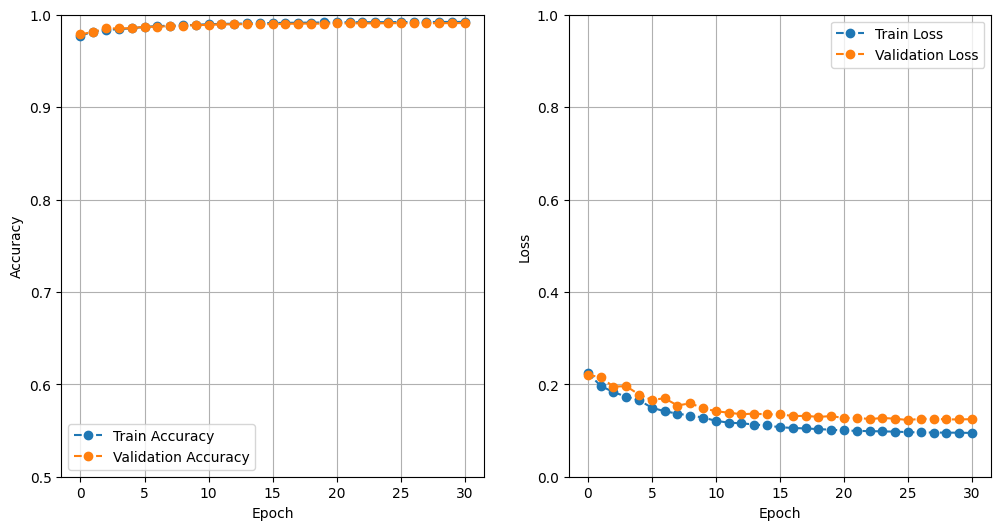

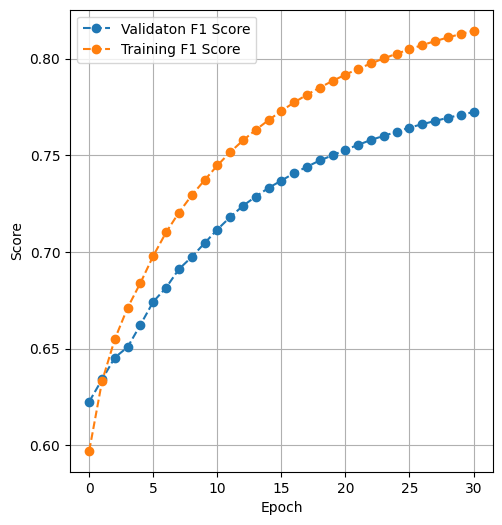

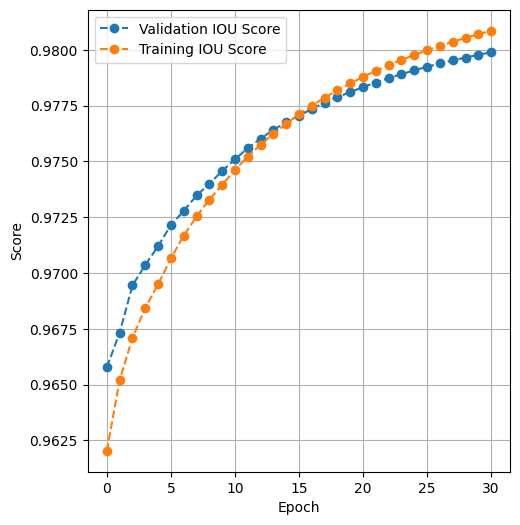

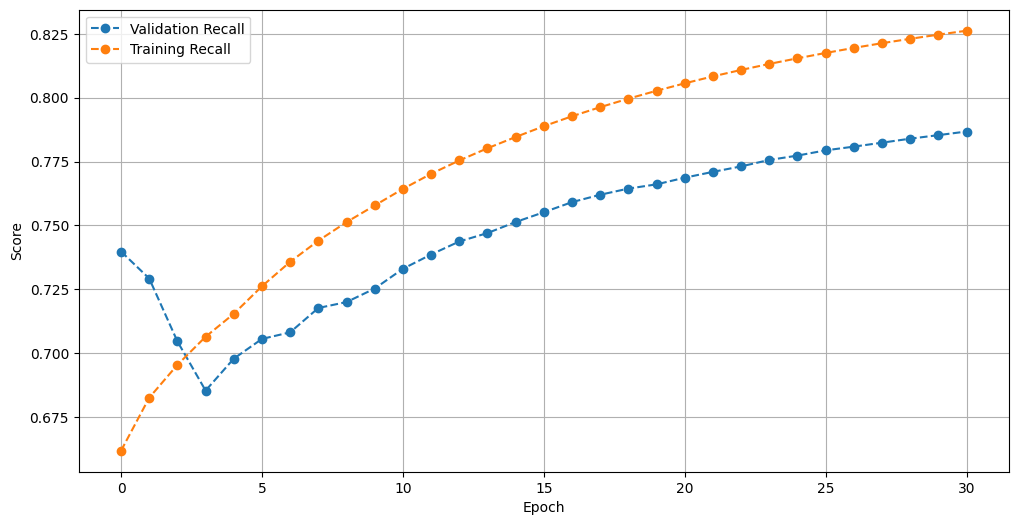

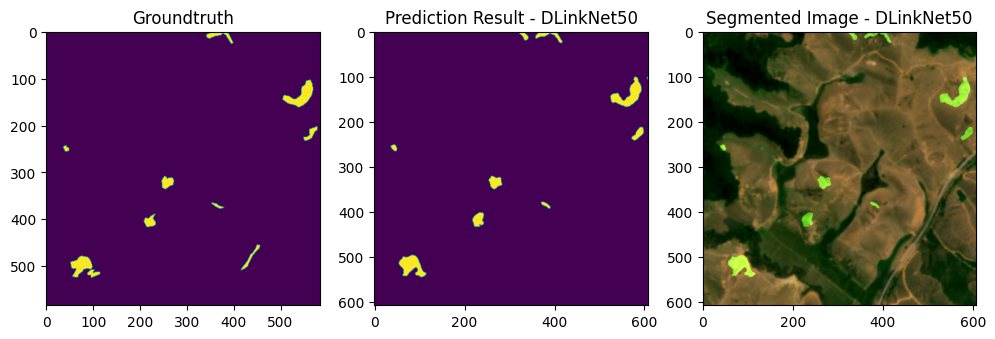

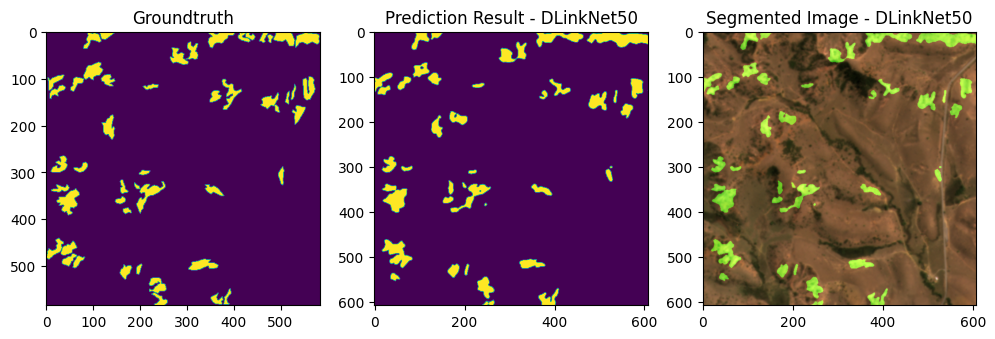

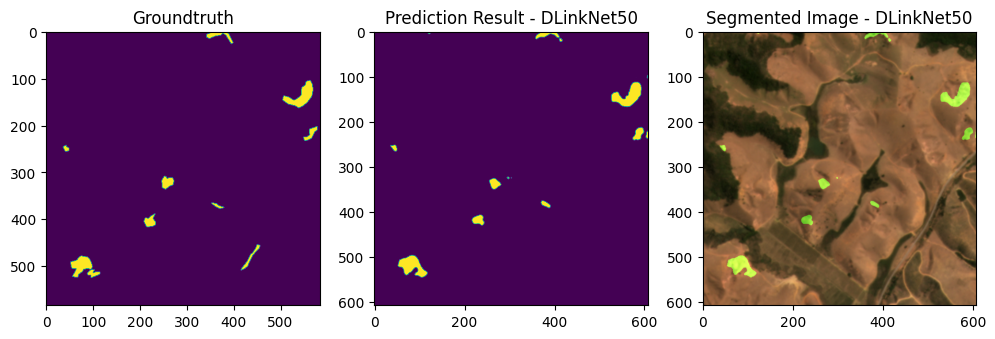

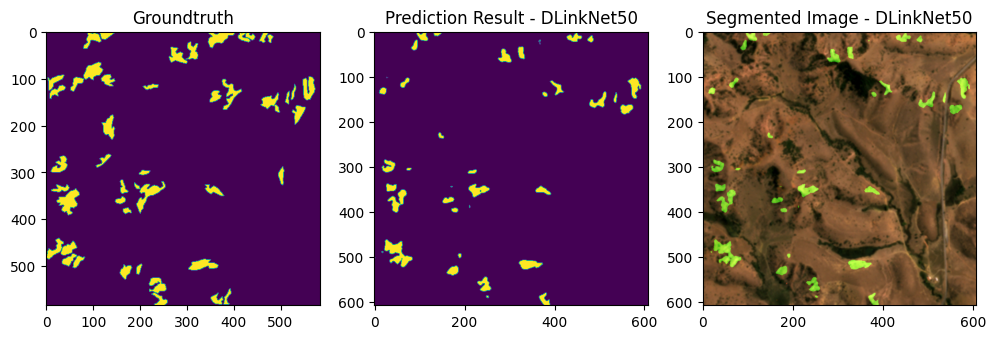

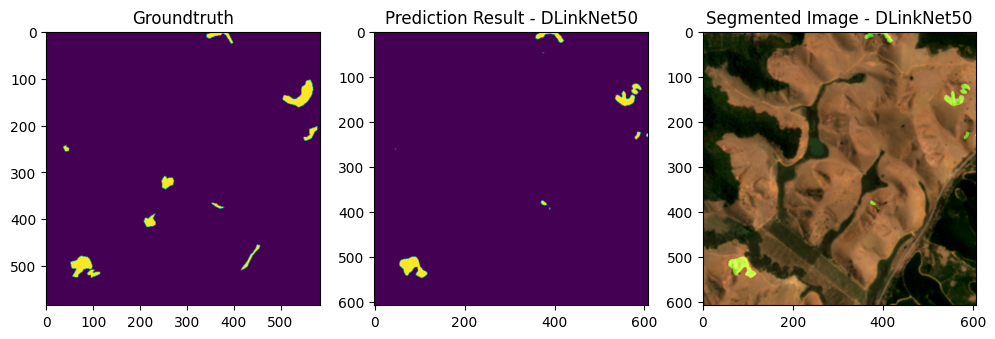

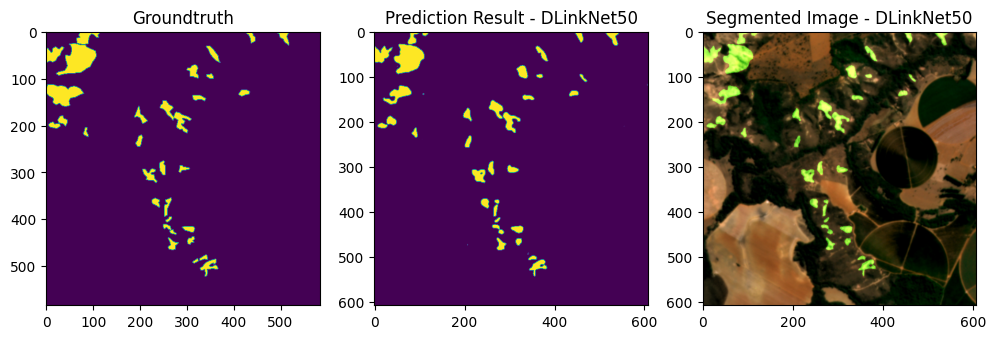

In [ ]:
# %%

if model_training:
    train(
        model,
        images_augmented,
        labels_augmented,
        images_validation,
        labels_validation,
        loss_func=BCEIoULoss(),
        batch_size=2,
        learning_rate=2e-4,
        epochs=100,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=5,
    )

if model_loading:
    # Load the model from your Google Drive or local file system
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)